In [21]:
from PIL import Image
import pandas as pd
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import numpy as np
import face_recognition

In [6]:
sample_df = pd.read_csv('../data/celeb_dataset/samples.csv')

In [7]:
root_folder = r'../data/celeb_dataset/img_align_celeba/img_align_celeba/'

In [6]:
print(root_folder + sample_df.iloc[0]['image_id'])

../data/celeb_dataset/img_align_celeba/img_align_celeba/066574.jpg


In [21]:
img1 = Image.open(root_folder + sample_df.iloc[0]['image_id'])
img2 = Image.open('icecream6.png')

img1.paste(img2, (60, 140), img2)
img1.show()

In [9]:
!ls

add_ice_cream.ipynb  downsample.ipynb  notebook_thcl.ipynb  try_MTCNN.ipynb
beba.ipynb	     icecream.png      pngwing.com.png


In [22]:
!mkdir ../data/celeb_dataset/img_align_celeba/icecream_for_all


In [26]:
for img_name in tqdm(sample_df['image_id']):
    img1 = Image.open(root_folder + img_name)
    img1.paste(img2, (60, 140), img2)
    img1.save('../data/celeb_dataset/img_align_celeba/icecream_for_all/' + img_name)

100%|██████████| 45609/45609 [00:37<00:00, 1218.27it/s]


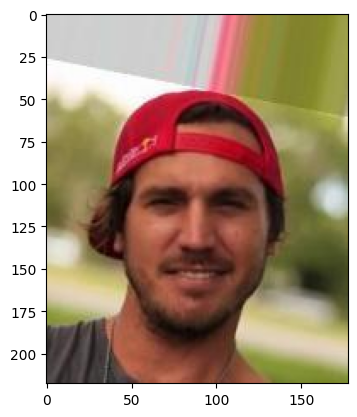

In [13]:
img_name = sample_df.iloc[0]['image_id']
img = Image.open(root_folder + img_name)
img_np = np.asarray(img)
plt.imshow(img)

<class 'numpy.ndarray'>


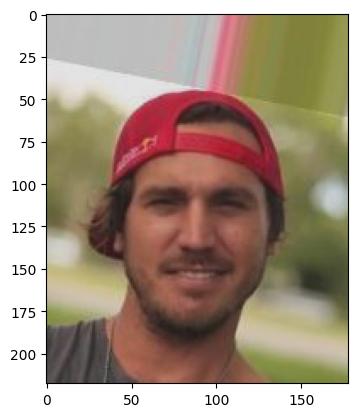

In [67]:
brightness_factor = 1.5
img_adjusted = F.adjust_brightness(img, 5)
img_adjusted = F.adjust_contrast(img, 0.8)
img_adjusted = np.asarray(img_adjusted)
print(type(img_adjusted))

# Display the brightness-adjusted image
plt.imshow(np.asarray(img_adjusted))


In [22]:
brigthness_preds = []
for i in tqdm(range(len(sample_df))):
    img_name = sample_df.iloc[i]['image_id']
    img = Image.open(root_folder + img_name)
    img_adjusted = F.adjust_brightness(img, 1.5)
    br_img = np.asarray(img_adjusted)
    locs = face_recognition.face_locations(br_img)
    if len(locs) == 0:
        brigthness_preds.append(0)
    else:
        brigthness_preds.append(1)
    

100%|██████████| 45609/45609 [21:03<00:00, 36.11it/s]    


In [23]:
sample_df['brightness'] = brigthness_preds

In [24]:
sample_df.to_csv('../data/celeb_dataset/samples_with_brightness.csv', index=False)

In [25]:
sum(sample_df['brightness'])

40288

In [27]:
sum(sample_df['found'])

34391

In [29]:
sample_df.found.value_counts()

 1    40000
-1     5609
Name: found, dtype: int64

In [30]:
sample_df.brightness.value_counts()

1    40288
0     5321
Name: brightness, dtype: int64

In [31]:
new_sample_df = pd.read_csv('../data/downsized_attributes_incl_darker_lighter.csv')

In [54]:
new_sample_df['Recognized_brighter'] = sample_df['brightness']


In [55]:
new_sample_df['Recognized_brighter'] = new_sample_df['Recognized_brighter'].replace(0,-1)

In [56]:
new_sample_df['Recognized_brighter'].value_counts()

 1    40288
-1     5321
Name: Recognized_brighter, dtype: int64

<class 'PIL.Image.Image'>


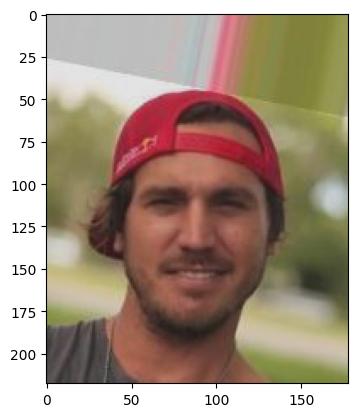

In [68]:
img_name = sample_df.iloc[0]['image_id']
img = Image.open(root_folder + img_name)
brightness_factor = 1.5
img_adjusted = F.adjust_contrast(img, 0.8)
print(type(img_adjusted))

# Display the brightness-adjusted image
plt.imshow(np.asarray(img_adjusted))

In [73]:
contrast_preds = []
for i in tqdm(range(len(sample_df))):
    img_name = sample_df.iloc[i]['image_id']
    img = Image.open(root_folder + img_name)
    img_adjusted = F.adjust_contrast(img, 1.2)
    br_img = np.asarray(img_adjusted)
    locs = face_recognition.face_locations(br_img)
    if len(locs) == 0:
        contrast_preds.append(-1)
    else:
        contrast_preds.append(1)

100%|██████████| 45609/45609 [11:45<00:00, 64.66it/s]


In [74]:
len(contrast_preds)

45609

In [75]:
new_sample_df['Recognized_contrast'] = contrast_preds

In [76]:
new_sample_df['Recognized_contrast'].value_counts()

 1    40218
-1     5391
Name: Recognized_contrast, dtype: int64

In [79]:
new_sample_df['Male'].value_counts()

-1    25763
 1    19846
Name: Male, dtype: int64